In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns





from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import OneHotEncoder






In [2]:
from sklearn.compose import make_column_selector

## cities kpi 2020

année 2020 seulement


In [3]:
cdpkpi = pd.read_csv('../raw_data/CDP-Cities-KPI.csv')

In [4]:
cdpkpi.columns

Index(['Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number', 'Organization',
       'City', 'Country', 'CDP.Region', 'First.Time.Discloser', 'Population',
       'City.Location', 'Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Risk.Health.System',
       'Nb.Adaptation.Actions', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration'

In [5]:
col = ['Account.Number', 'Organization','City', 'Country','Population','Hazards.Exposure.Level','Adaptation.Challenges.Level', 'Risk.Health.System','Potable.Water.Supply.Percent','lat', 'long']

In [6]:
new = cdpkpi[col]
new

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long
0,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,692587.0,41.0,2.0,Yes,100.00,36.162700,-86.781600
1,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,68823.0,12.0,NaN,No,100.00,-20.285800,-50.247500
2,57509,Prefeitura Niterói,Niterói,Brazil,513584.0,121.0,NaN,Yes,100.00,-22.892800,-43.118400
3,60114,City of Gdynia,Gdynia,Poland,246348.0,NaN,NaN,NaN,NaN,54.518900,18.530500
4,32550,City of Denver,Denver,United States of America,716492.0,65.0,NaN,Yes,100.00,39.737600,-104.985000
5,54519,City of Lund,Lund,Sweden,124935.0,74.0,NaN,Yes,100.00,55.702930,13.192945
6,35897,Municipality of Campinas,Campinas,Brazil,1204073.0,123.0,NaN,Yes,99.81,-22.744000,-46.937200
7,68383,Prefeitura de Itatiba,Itatiba,Brazil,115051.0,12.0,NaN,Yes,99.00,-12.250000,-38.970000
8,59563,"City of Takoma Park, MD",Takoma Park,United States of America,17765.0,80.0,NaN,Yes,100.00,38.977900,-77.007500
9,31165,Stadt Heidelberg,Heidelberg,Germany,148365.0,38.0,2.0,No,99.00,49.398800,8.672430


In [7]:
new[new['City']=="Bristol"]

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long
55,2185,Bristol City Council,Bristol,United Kingdom of Great Britain and Northern I...,463400.0,NaN,1.0,Yes,100.0,51.45,-2.5833
56,2185,Bristol City Council,Bristol,United Kingdom of Great Britain and Northern I...,463400.0,NaN,1.0,Yes,100.0,51.45,-2.5833


In [8]:
def cleanan(x):
    if pd.isna(x):
        return 0
    else:
        return x
    
def strinan(x):
    if x == "Yes":
        return 1
   
    else:
        return 0
def pournan(x):
    if pd.isna(x):
        return 100
    else:
        return (100-x)
    
def ssminmax(x):
    m=0
    M=100
    return (x-m)/(M-m)

In [9]:
new1 = new.copy()

In [10]:
new1

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long
0,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,692587.0,41.0,2.0,Yes,100.00,36.162700,-86.781600
1,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,68823.0,12.0,NaN,No,100.00,-20.285800,-50.247500
2,57509,Prefeitura Niterói,Niterói,Brazil,513584.0,121.0,NaN,Yes,100.00,-22.892800,-43.118400
3,60114,City of Gdynia,Gdynia,Poland,246348.0,NaN,NaN,NaN,NaN,54.518900,18.530500
4,32550,City of Denver,Denver,United States of America,716492.0,65.0,NaN,Yes,100.00,39.737600,-104.985000
5,54519,City of Lund,Lund,Sweden,124935.0,74.0,NaN,Yes,100.00,55.702930,13.192945
6,35897,Municipality of Campinas,Campinas,Brazil,1204073.0,123.0,NaN,Yes,99.81,-22.744000,-46.937200
7,68383,Prefeitura de Itatiba,Itatiba,Brazil,115051.0,12.0,NaN,Yes,99.00,-12.250000,-38.970000
8,59563,"City of Takoma Park, MD",Takoma Park,United States of America,17765.0,80.0,NaN,Yes,100.00,38.977900,-77.007500
9,31165,Stadt Heidelberg,Heidelberg,Germany,148365.0,38.0,2.0,No,99.00,49.398800,8.672430


In [11]:
num_col=['Hazards.Exposure.Level','Adaptation.Challenges.Level']
stri_col=['Risk.Health.System']

In [12]:
new1['Hazards.Exposure.Level']=new1['Hazards.Exposure.Level'].apply(cleanan)
new1['Adaptation.Challenges.Level']=new1['Adaptation.Challenges.Level'].apply(cleanan)
new1['Risk.Health.System']=new1['Risk.Health.System'].apply(strinan)
new1['Potable.Water.Supply.vulnerability']=new1['Potable.Water.Supply.Percent'].apply(pournan)

In [13]:
new1.nunique()

Account.Number                        566
Organization                          566
City                                  447
Country                                75
Population                            564
Hazards.Exposure.Level                156
Adaptation.Challenges.Level             9
Risk.Health.System                      2
Potable.Water.Supply.Percent           71
lat                                   542
long                                  542
Potable.Water.Supply.vulnerability     72
dtype: int64

In [14]:
new1['Potable.Water.Supply.vulnerability'].max()

100.0

In [15]:
def ssminmaxe(x):
    m=0
    M=352
    return (x-m)/(M-m)
def ssminmax(x):
    m=0
    M=8
    return (x-m)/(M-m)
def ssminma(x):
    m=0
    M=100
    return (x-m)/(M-m)

In [16]:
new1['exposure.level']=new1['Hazards.Exposure.Level'].apply(ssminmaxe)
new1['City.Adaptation.Challenges.Index'] =new1['Adaptation.Challenges.Level'].apply(ssminmax)
new1['Potable.Water.Supply.vulnerability']= new1['Potable.Water.Supply.vulnerability'].apply(ssminma)
new1['sensitivity.index']=(new1['Risk.Health.System'] + new1['Potable.Water.Supply.vulnerability'])/2
new1['Vulnerability']=(new1['exposure.level']+new1['City.Adaptation.Challenges.Index']+new1['sensitivity.index'])/3

In [17]:
new1[new1['City']=="Bristol"]

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long,Potable.Water.Supply.vulnerability,exposure.level,City.Adaptation.Challenges.Index,sensitivity.index,Vulnerability
55,2185,Bristol City Council,Bristol,United Kingdom of Great Britain and Northern I...,463400.0,0.0,1.0,1,100.0,51.45,-2.5833,0.0,0.0,0.125,0.5,0.208333
56,2185,Bristol City Council,Bristol,United Kingdom of Great Britain and Northern I...,463400.0,0.0,1.0,1,100.0,51.45,-2.5833,0.0,0.0,0.125,0.5,0.208333


In [18]:
y=new1['Vulnerability']

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Country', ylabel='Vulnerability'>

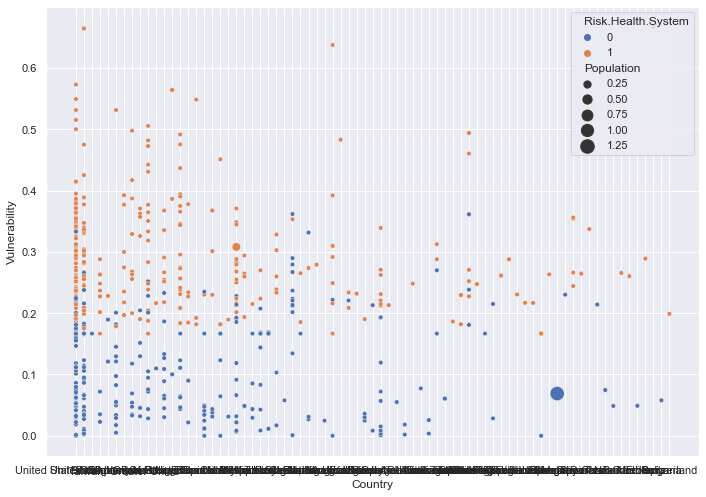

In [20]:
sns.scatterplot(x=new1['Country'],y =y,size=new1['Population'],hue=new1['Risk.Health.System'],sizes=(20, 200))

In [21]:
colone=['Account.Number','Vulnerability']

In [22]:
target = new1[colone]

In [23]:
target.to_csv('vulnerability.csv',index=False)

In [24]:
cri = pd.read_csv('../raw_data/CRI.csv')

In [25]:
cri

,Unnamed: 0,Account.Number,City.Readiness.Index
0,0,49335,0.674167
1,1,60278,0.458333
2,2,57509,0.604167
3,3,60114,0.375000
4,4,32550,0.788333
5,5,54519,0.906875
6,6,35897,0.691771
7,7,68383,0.291667
8,8,59563,0.565500
9,9,31165,0.801063


In [26]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

### Nos target 

In [27]:
a=cri['City.Readiness.Index']
b=y

In [28]:
k= (a*(1-b))/(a+(1-b))

In [29]:
new= cdpkpi


In [30]:
#ohe['Risk.Health.System','Sustainability.Targets.Master.Planning','Risk.Assessment.Actions','Adaptation.Plan' ,'City.Wide.Emissions.Inventory ','GHG.Emissions.Primary.protocol','GHG.Emissions.Evolution ','GHG.Emissions.Consumption ','GHG.Emissions.External.Verification ','GHG.Emissions.Reductions.Targets','Emissions.Reductions.Mitigation.Planning','Opportunities.Collaboration ','Renewable.Energy.Target','Energy.Efficnecy.Target','Low.Zero.Emission.Zone ','Food.Consumption.Policies','Water.Resource.Management.strategy']


In [31]:
new

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3
0,1,2020,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,No,692587.0,POINT (-86.7816 36.1627),Yes,Yes,3.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,Yes,6,In progress,Yes,GPC,Decreased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,24.0000,20.00,0.00,9.00,37.00,0.00,7.00,1.50,1.50,12.00,Yes,2.10,0.20,6.70,89.00,2.00,No,Yes,100.00,Not intending to undertake,36.162700,-86.781600,USA
1,2,2020,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,Latin America,No,68823.0,POINT (-50.2475 -20.2858),Intending to incorporate in the next 2 years,Intending to undertake in the next 2 years,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1,Do not know,Yes,Regional or country specific methodology,Decreased,Do not know,Do not know,No target,NaN,Yes,In progress,0.00,0.0000,0.00,0.00,98.00,0.00,0.00,0.00,2.00,0.00,100.00,In progress,NaN,NaN,NaN,NaN,NaN,Do not know,Yes,100.00,In progress,-20.285800,-50.247500,BRA
2,3,2020,57509,Prefeitura Niterói,Niterói,Brazil,Latin America,No,513584.0,POINT (-43.1184 -22.8928),Yes,Yes,9.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10,Yes,Yes,GPC,This is our first year of calculation,Not intending to undertake,Yes,No target,In progress,Yes,Do not know,0.00,NaN,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,100.00,Intending to undertake in the next 2 years,41.00,4.00,0.00,26.00,29.00,No,Yes,100.00,Yes,-22.892800,-43.118400,BRA
3,4,2020,60114,City of Gdynia,Gdynia,Poland,Europe,No,246348.0,POINT (18.5305 54.5189),Yes,Yes,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.518900,18.530500,POL
4,5,2020,32550,City of Denver,Denver,United States of America,North America,No,716492.0,POINT (-104.985 39.7376),Yes,Yes,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,11,Yes,Yes,GPC,Decreased,Yes,In progress,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,39.0000,33.00,0.00,1.00,0.00,0.00,0.00,3.00,24.00,28.00,In progress,NaN,NaN,NaN,NaN,NaN,No,Yes,100.00,Not intending to undertake,39.737600,-104.985000,USA
5,6,2020,54519,City of Lund,Lund,Sweden,Europe,Yes,124935.0,NaN,Yes,Yes,5.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4,Yes,Yes,City specific methodology,Decreased,Intending to undertake in the next 2 years,Yes,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,0.0000,0.00,0.00,40.00,39.00,0.00,10.00

In [32]:
#new.to_csv('kpiwithtarget.csv',index=False)

In [33]:
#new[new['']]

KeyError: ''

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector

In [35]:
new.select_dtypes('float64').columns

Index(['Population', 'Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Electricity.Source.Biomass',
       'Electricity.Source.Coal', 'Electricity.Source.Gas',
       'Electricity.Source.Geothermal', 'Electricity.Source.Hydro',
       'Electricity.Source.Nuclear', 'Electricity.Source.Oil',
       'Electricity.Source.Other', 'Electricity.Source.Solar',
       'Electricity.Source.Wind', 'Electricity.Source.Renewable',
       'Transport.Mode.Passenger.Public', 'Transport.Mode.Passenger.Cycling',
       'Transport.Mode.Passenger.Other',
       'Transport.Mode.Passenger.Private.motorized',
       'Transport.Mode.Passenger.Walking', 'Potable.Water.Supply.Percent',
       'lat', 'long'],
  

In [36]:
flo= ['Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Electricity.Source.Biomass',
       'Electricity.Source.Coal', 'Electricity.Source.Gas',
       'Electricity.Source.Geothermal', 'Electricity.Source.Hydro',
       'Electricity.Source.Nuclear', 'Electricity.Source.Oil',
       'Electricity.Source.Other', 'Electricity.Source.Solar',
       'Electricity.Source.Wind', 'Electricity.Source.Renewable',
       'Transport.Mode.Passenger.Public', 'Transport.Mode.Passenger.Cycling',
       'Transport.Mode.Passenger.Other',
       'Transport.Mode.Passenger.Private.motorized',
       'Transport.Mode.Passenger.Walking']
cat=['Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Risk.Health.System', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration', 'Renewable.Energy.Target',
       'Energy.Efficnecy.Target', 'Low.Zero.Emission.Zone',
       'Food.Consumption.Policies', 'Water.Resource.Management.strategy']

In [37]:
reg=LinearRegression()

num_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer,  flo),
    ('cat_transformer', cat_transformer,  cat)
    ])


final_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', reg)])



In [38]:
X=new[flo+cat]

In [39]:
X['Potable.Water.Supply.vulnerability']=new1['Potable.Water.Supply.vulnerability']

c:\users\adric\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
X

,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Risk.Health.System,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Energy.Efficnecy.Target,Low.Zero.Emission.Zone,Food.Consumption.Policies,Water.Resource.Management.strategy,Potable.Water.Supply.vulnerability
0,3.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.00,24.0000,20.00,0.00,9.00,37.00,0.00,7.00,1.50,1.50,12.00,2.10,0.20,6.70,89.00,2.00,Yes,Yes,Yes,In progress,Yes,GPC,Decreased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,Yes,No,Yes,Not intending to undertake,0.0000
1,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0000,0.00,0.00,98.00,0.00,0.00,0.00,2.00,0.00,100.00,NaN,NaN,NaN,NaN,NaN,Intending to incorporate in the next 2 years,Intending to undertake in the next 2 years,No,Do not know,Yes,Regional or country specific methodology,Decreased,Do not know,Do not know,No target,NaN,Yes,In progress,In progress,Do not know,Yes,In progress,0.0000
2,9.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,100.00,41.00,4.00,0.00,26.00,29.00,Yes,Yes,Yes,Yes,Yes,GPC,This is our first year of calculation,Not intending to undertake,Yes,No target,In progress,Yes,Do not know,Intending to undertake in the next 2 years,No,Yes,Yes,0.0000
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Yes,NaN,Yes,NaN,NaN,NaN,NaN,1.0000
4,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,39.0000,33.00,0.00,1.00,0.00,0.00,0.00,3.00,24.00,28.00,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,GPC,Decreased,Yes,In progress,Base year emissions (absolute) target,Yes,Yes,Yes,In progress,No,Yes,Not intending to undertake,0.0000
5,5.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0000,0.00,0.00,40.00,39.00,0.00,10.00,0.00,11.00,51.00,23.60,27.10,0.90,34.20,14.20,Yes,Yes,Yes,Yes,Yes,City specific methodology,Decreased,Intending to undertake in the next 2 years,Yes,Base year emissions (absolute) target,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0.0000
6,7.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.30,2.4000,9.60,0.00,63.50,2.60,1.30,2.30,1.10,8.90,73.50,14.20,2.20,15.10,43.40,25.10,Yes,Yes,Yes,In progress,Yes,GPC,This is our first year of calculation,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,In progress,Do not know,Yes,Yes,Yes,0.0019
7,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,Yes,In progress,Yes,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,No target,In progress,In progress,In progress,Intending to undertake in the next 2 years,Do not know,Do not know,Yes,0.0100
8,8.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.30,29.8000,28.70,0.00,1.40,35.30,0.30,0.80,0.30,3.10,4.80,NaN,NaN,NaN,NaN,NaN,Yes

In [41]:
cdpkpi[cdpkpi['Hazards.Exposure.Level']>= 200]

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3
99,100,2020,60387,Alcaldía de Sincelejo,Sincelejo,Colombia,Latin America,No,277773.0,POINT (-75.3906 9.30457),Yes,NaN,9.0,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Intending to undertake in the next 2 years,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not intending to undertake,NaN,NaN,NaN,NaN,NaN,No,Do not know,NaN,Intending to undertake in next 2 years,9.304570,-75.390600,COL
104,105,2020,50381,Municipio de Torreón,Torreón,Mexico,Latin America,No,679288.0,POINT (-103.407 25.5428),Yes,Yes,12.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,In progress,NaN,NaN,NaN,NaN,No target,NaN,NaN,In progress,0.00,0.00,0.00,0.0,15.00,0.00,70.00,0.00,15.000,0.00,30.00,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.00,In progress,25.542800,-103.407000,MEX
141,142,2020,59538,City of Mississauga,Mississauga,Canada,North America,No,721599.0,POINT (43.589 -79.6441),In progress,Yes,15.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,5,Yes,Yes,GPC,Increased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,0.60,0.00,8.20,0.0,23.70,61.00,0.00,0.00,0.300,6.20,30.20,Do not know,11.00,0.00,1.00,84.0,4.0,No,Yes,100.00,Not intending to undertake,43.600000,-79.650000,CAN
229,230,2020,35475,City of Calgary,Calgary,Canada,North America,No,1285711.0,POINT (-114.071 51.0486),Yes,Yes,14.0,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,11,Yes,Yes,GPC,Increased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,2.40,42.05,47.91,NaN,2.26,NaN,NaN,0.40,0.026,4.95,NaN,In progress,9.00,1.30,0.30,73.0,16.4,No,Yes,100.00,Yes,51.048600,-114.071000,CAN
237,238,2020,73650,Armstrong,NaN,Argentina,Latin America,No,11484.0,NaN,NaN,Intending to undertake in the next 2 years,36.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Intending to undertake in the next 2 years,Yes,GPC,NaN,NaN,Do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.800000,-58.383300,ARG
298,299,2020,74594,City of Boynton Beach,Boynton Beach,United States of America,North America,No,77696.0,POINT (-80.216 26.4986),In progress,In progress,15.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,25,In progress,Yes,GPC,This is our first year of calculation,Not intending to undertake,Not intending to undertake,Base year emissions (absolute) target,Y

a= readiness   k=moyenne harmo de readi et vulnerability

In [42]:
y=k


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
final_pipe_trained = final_pipe.fit(X_train,y_train)

# Make predictions
#final_pipe_trained.predict(X_test.iloc[0:2])

# Score model
final_pipe_trained.score(X_test,y_test)

0.9457179102020894

In [46]:
cross_val_score(final_pipe, X_train, y_train, cv=8, scoring='r2')

array([0.95820476, 0.96914976, 0.9579107 , 0.9710725 , 0.96270546,
       0.95748019, 0.95695172, 0.96108971])

Text(0.5, 0, 'readiness')

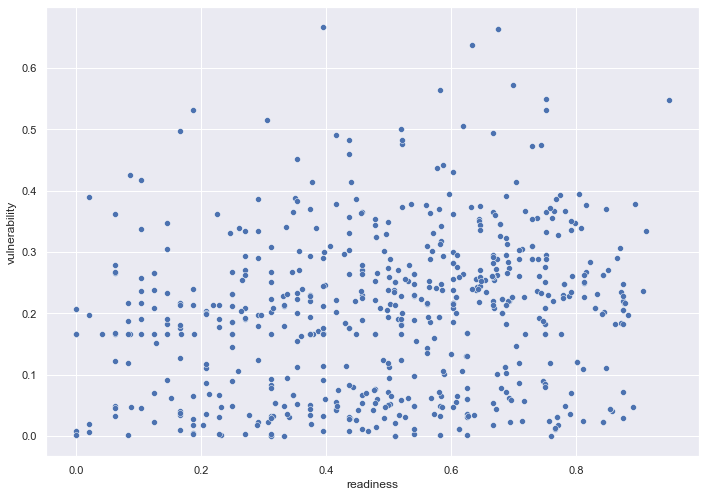

In [103]:
ax =sns.scatterplot(x=a,y=b)
ax.set_ylabel('vulnerability')

ax.set_xlabel('readiness')

In [106]:
import plotly.express as px
df = new.copy()
df['readiness']=a
df['vulnerability']=b
fig = px.scatter(df, x="readiness", y="vulnerability",

                 hover_data=['Organization'])


fig.show()


In [107]:
fig = px.scatter(df,x=a,y=k,
                hover_data=['Organization'])
fig.show()

In [115]:
fig = px.scatter_3d(df,x=a,y=k,z=b,
                hover_data=['Organization'])
fig.show()

In [108]:
def colorlabel(x):
    if x <= 0.33:
        return 'red'
    elif (x > 0.33) and (x <=0.66):
        return 'orange'
    elif x > 0.66 :
        return 'green'
    else:
        return 'black'

In [109]:
df

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3,readiness,vulnerability
0,1,2020,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,No,692587.0,POINT (-86.7816 36.1627),Yes,Yes,3.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,Yes,6,In progress,Yes,GPC,Decreased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,24.0000,20.00,0.00,9.00,37.00,0.00,7.00,1.50,1.50,12.00,Yes,2.10,0.20,6.70,89.00,2.00,No,Yes,100.00,Not intending to undertake,36.162700,-86.781600,USA,0.674167,0.288826
1,2,2020,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,Latin America,No,68823.0,POINT (-50.2475 -20.2858),Intending to incorporate in the next 2 years,Intending to undertake in the next 2 years,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1,Do not know,Yes,Regional or country specific methodology,Decreased,Do not know,Do not know,No target,NaN,Yes,In progress,0.00,0.0000,0.00,0.00,98.00,0.00,0.00,0.00,2.00,0.00,100.00,In progress,NaN,NaN,NaN,NaN,NaN,Do not know,Yes,100.00,In progress,-20.285800,-50.247500,BRA,0.458333,0.011364
2,3,2020,57509,Prefeitura Niterói,Niterói,Brazil,Latin America,No,513584.0,POINT (-43.1184 -22.8928),Yes,Yes,9.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10,Yes,Yes,GPC,This is our first year of calculation,Not intending to undertake,Yes,No target,In progress,Yes,Do not know,0.00,NaN,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,100.00,Intending to undertake in the next 2 years,41.00,4.00,0.00,26.00,29.00,No,Yes,100.00,Yes,-22.892800,-43.118400,BRA,0.604167,0.281250
3,4,2020,60114,City of Gdynia,Gdynia,Poland,Europe,No,246348.0,POINT (18.5305 54.5189),Yes,Yes,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.518900,18.530500,POL,0.375000,0.166667
4,5,2020,32550,City of Denver,Denver,United States of America,North America,No,716492.0,POINT (-104.985 39.7376),Yes,Yes,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,11,Yes,Yes,GPC,Decreased,Yes,In progress,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,39.0000,33.00,0.00,1.00,0.00,0.00,0.00,3.00,24.00,28.00,In progress,NaN,NaN,NaN,NaN,NaN,No,Yes,100.00,Not intending to undertake,39.737600,-104.985000,USA,0.788333,0.228220
5,6,2020,54519,City of Lund,Lund,Sweden,Europe,Yes,124935.0,NaN,Yes,Yes,5.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4,Yes,Yes,City specific methodology,Decreased,Intending to undertake in t

In [110]:
for i in df.iterrows():
    print(i[1][58])

0.6741666666666666
0.4583333333333333
0.6041666666666667
0.375
0.7883333333333333
0.906875
0.6917708333333332
0.29166666666666663
0.5655
0.8010625
0.8010625
0.43966875
0.37716875
0.25
0.15229166666666666
0.75
0.29166666666666663
0.0625
0.875
0.875
0.692525
0.2083333333333333
0.8163541666666666
0.5833333333333334
0.8475208333333334
0.125
0.5
0.69875625
0.89425
0.21875
0.14583333333333331
0.6875
0.7660416666666667
0.16666666666666666
0.870625
0.22916666666666666
0.5215000000000001
0.79875
0.3125
0.75625
0.4791666666666666
0.580625
0.580625
0.4583333333333333
0.567275
0.375
0.4917416666666667
0.3879166666666666
0.22625
0.1875
0.02083333333333333
0.7095833333333332
0.6738541666666666
0.375
0.16666666666666666
0.830125
0.830125
0.7291666666666666
0.3125
0.875
0.7708333333333333
0.125
0.64061875
0.4479166666666667
0.5613541666666666
0.625
0.625
0.1875
0.3958333333333333
0.3958333333333333
0.669375
0.6666666666666667
0.5208333333333333
0.3125
0.14583333333333331
0.7384791666666667
0.208333333

In [111]:
import folium


m = folium.Map(location=[45.5236, -122.6750])

In [112]:
for i in df.iterrows():
    couleur = colorlabel(i[1][58])
    lat=i[1][55]
    lon=i[1][56]
    txt=f'readiness score:{i[1][58]} \n vulnerability score:{i[1][59]} \n Orga:{i[1][3]}'
    
    #folium.Marker(
    folium.CircleMarker(
    
    location=[lat,lon],
    popup=txt,
    #icon=folium.Icon(color=couleur)
     
    radius=5,
    
    color=couleur,
    fill=True,
    fill_color=couleur   
        
    
    ).add_to(m)

60-80% de nan 

In [113]:
m

In [55]:
from sklearn.linear_model import Ridge

In [56]:
reg=Ridge()

num_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer,  flo),
    ('cat_transformer', cat_transformer,  cat)
    ])


final_pipe_rid = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', reg)])


In [57]:
final_pipe_rid_trained = final_pipe_rid.fit(X_train,y_train)

# Make predictions
#final_pipe_trained.predict(X_test.iloc[0:2])

# Score model
final_pipe_rid_trained.score(X_test,y_test)

0.9492197233951581

In [58]:
cross_val_score(final_pipe, X_train, y_train, cv=8, scoring='r2')

array([0.95820476, 0.96914976, 0.9579107 , 0.9710725 , 0.96270546,
       0.95748019, 0.95695172, 0.96108971])

In [59]:
from sklearn import linear_model
from sklearn.preprocessing import FunctionTransformer

In [60]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomScaler(TransformerMixin, BaseEstimator): 
# TransformerMixin generates a fit_transform method from fit and transform
# BaseEstimator generates get_params and set_params methods
    def __init__(self):
        pass
        
    
    
    def fit(self, X, y=None):
        self.means = X.mean()
        self.max = X.max()
        self.min = X.min()
        return self
    
    def transform(self, X, y=None):
        
        X= 100 - X
        X_transformed = (X - self.min)/(self.max-self.min) 
        # Return result as dataframe for integration into ColumnTransformer
        return pd.DataFrame(X_transformed)
    

In [61]:
X=cdpkpi.copy()
X=X.drop(['Organization','City','Country','Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number','CDP.Region', 'First.Time.Discloser','Country.Code.3','City.Location'],1)
X

,Population,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long
0,692587.0,Yes,Yes,3.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,Yes,6,In progress,Yes,GPC,Decreased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,24.0000,20.00,0.00,9.00,37.00,0.00,7.00,1.50,1.50,12.00,Yes,2.10,0.20,6.70,89.00,2.00,No,Yes,100.00,Not intending to undertake,36.162700,-86.781600
1,68823.0,Intending to incorporate in the next 2 years,Intending to undertake in the next 2 years,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1,Do not know,Yes,Regional or country specific methodology,Decreased,Do not know,Do not know,No target,NaN,Yes,In progress,0.00,0.0000,0.00,0.00,98.00,0.00,0.00,0.00,2.00,0.00,100.00,In progress,NaN,NaN,NaN,NaN,NaN,Do not know,Yes,100.00,In progress,-20.285800,-50.247500
2,513584.0,Yes,Yes,9.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10,Yes,Yes,GPC,This is our first year of calculation,Not intending to undertake,Yes,No target,In progress,Yes,Do not know,0.00,NaN,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,100.00,Intending to undertake in the next 2 years,41.00,4.00,0.00,26.00,29.00,No,Yes,100.00,Yes,-22.892800,-43.118400
3,246348.0,Yes,Yes,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.518900,18.530500
4,716492.0,Yes,Yes,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,11,Yes,Yes,GPC,Decreased,Yes,In progress,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,39.0000,33.00,0.00,1.00,0.00,0.00,0.00,3.00,24.00,28.00,In progress,NaN,NaN,NaN,NaN,NaN,No,Yes,100.00,Not intending to undertake,39.737600,-104.985000
5,124935.0,Yes,Yes,5.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4,Yes,Yes,City specific methodology,Decreased,Intending to undertake in the next 2 years,Yes,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,0.0000,0.00,0.00,40.00,39.00,0.00,10.00,0.00,11.00,51.00,Yes,23.60,27.10,0.90,34.20,14.20,Yes,Yes,100.00,Yes,55.702930,13.192945
6,1204073.0,Yes,Yes,7.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,7,In progress,Yes,GPC,This is our first year of calculation,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,In progress,8.30,2.4000,9.60,0.00,63.50,2.60,1.30,2.30,1.10,8.90,73.50,Do not know,14.20,2.20,15.10,43.40,25.10,Yes,Yes,99.81,Yes,-22.744000,-46.937200
7,115051.0,Yes,In progress,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,2,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,No target,In progress,In progress,In progress,0.00,0.0000,0.

In [62]:
X.columns

Index(['Population', 'Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Risk.Health.System',
       'Nb.Adaptation.Actions', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration', 'Renewable.Energy.Target',
       'Electricity.Source.Biomass', 'Electricity.Source.Coal',
       'Electricity.Source.Gas', 'Electricity.Source.Geothermal',
 

In [63]:
len(X.columns)

48

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [65]:
reg=LinearRegression()

customscaler = CustomScaler()

water_transform = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscaler)])

num_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('water_transformer', water_transform,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformer,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformer,  make_column_selector(dtype_include=['object']))
    
    ])


final_pipel = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', reg)])


In [66]:
pd.DataFrame(preprocessor.fit_transform(X)).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
0,0.0000,0.000501,0.083333,0.116477,0.0,0.25,0.00,0.000000,0.5,0.000000,0.0,0.250,0.000000,0.2400,0.2000,0.0,0.0900,0.428737,0.0000,0.0700,0.015,0.015,0.1200,0.024706,0.002,0.051538,0.912259,0.028571,1.0000,0.735010,0.193525,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0000,0.000050,0.055556,0.034091,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0000,0.0000,0.0,0.9800,0.000000,0.0000,0.0000,0.020,0.000,1.0000,0.000000,0.000,0.000000,0.000000,0.000000,1.0000,0.229213,0.305541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0000,0.000371,0.250000,0.343750,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0000,0.0000,0.0,1.0000,0.000000,0.0000,0.0000,0.000,0.000,1.0000,0.482353,0.040,0.000000,0.266503,0.414286,1.0000,0.205854,0.327399,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0000,0.000178,0.138889,0.000000,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0000,0.0000,0.0,0.0000,0.000000,0.0000,0.0000,0.000,0.000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.0000,0.899488,0.516418,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0000,0.000518,0.111111,0.184659,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.3900,0.3300,0.0,0.0100,0.000000,0.0000,0.0000,0.030,0.240,0.2800,0.000000,0.000,0.000000,0.000000,0.000000,1.0000,0.767042,0.137712,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0000,0.000090,0.138889,0.210227,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.0000,0.0000,0.0,0.4000,0.451912,0.0000,0.1000,0.000,0.110,0.5100,0.277647,0.271,0.006923,0.350554,0.202857,1.0000,0.910097,0.500053,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,0.0019,0.000870,0.194444,0.349432,0.0,0.00,0.00,0.000000,

In [67]:
final_pipel_trained = final_pipel.fit(X_train,y_train)

# Make predictions
#final_pipe_trained.predict(X_test.iloc[0:2])

# Score model
final_pipel_trained.score(X_test,y_test)

0.8722776099440636

In [68]:
cross_val_score(final_pipe, X_train, y_train, cv=8, scoring='r2')

array([0.95820476, 0.96914976, 0.9579107 , 0.9710725 , 0.96270546,
       0.95748019, 0.95695172, 0.96108971])

In [69]:
col_to_use=[
'Hazards.Exposure.Level',
'Risk.Health.System',
'Adaptation.Plan',
'Emissions.Reductions.Mitigation.Planning',
'Water.Resource.Management.strategy',
'GHG.Emissions.Reductions.Targets',
'Food.Consumption.Policies',
'Potable.Water.Supply.Percent',
'Adaptation.Challenges.Level',
'Electricity.Source.Renewable']

In [70]:
learning_curves_elements = pd.DataFrame(columns=['train_score', 'test_score', 'train_size'])

X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)


X_train['target']= y_train

data_train = X_train.copy()



In [71]:
train_sizes = [10,50,100,200,300,400]
for size in train_sizes:
    
 # Sample the training set
    data_train_sample = data_train.sample(size, random_state = 1)
    #print(data_train_sample.drop(0, 1))
    # Prepare X and y
    X_train = data_train_sample.drop("target", 1)
    y_train = data_train_sample["target"]
    
    # Train the model on the sampled Train data
    model = final_pipel.fit(X_train,y_train)
    # Score the model on the train data (sampled) and test data (fixed)
    test_score =   model.score(X_test,y_test)
    train_score =  model.score(X_train,y_train)
    
    # Append associated train score, test score, and train size to dataframe
    learning_curves_elements = learning_curves_elements.append({'train_score': train_score,
                                  'test_score': test_score,
                                   'train_size': size}, ignore_index=True)

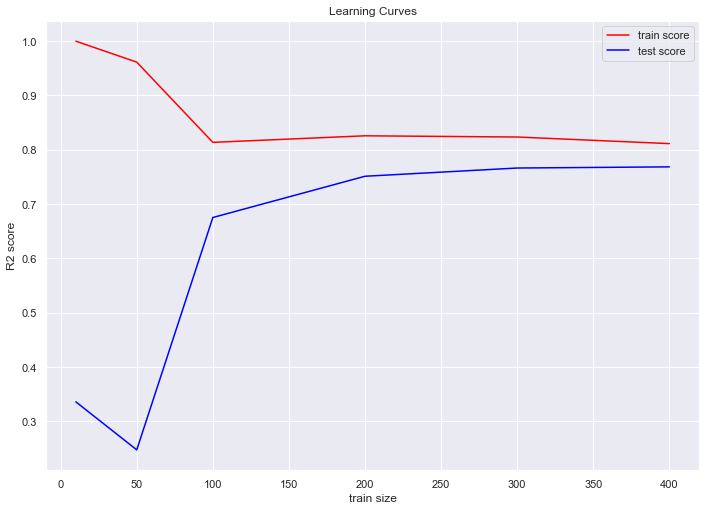

In [72]:
import matplotlib.pyplot as plt

plt.plot(learning_curves_elements.train_size,learning_curves_elements.train_score,  color = 'red', label='train score')
plt.plot(learning_curves_elements.train_size,learning_curves_elements.test_score, color = 'blue', label='test score')
plt.title('Learning Curves')
plt.xlabel('train size')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [73]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [74]:
X =X[col_to_use]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [75]:
numcol=['Hazards.Exposure.Level','Potable.Water.Supply.Percent','Adaptation.Challenges.Level','Electricity.Source.Renewable']

In [76]:
Nn = NearestNeighbors(n_neighbors=3)

In [77]:

pred=np.array([100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]).reshape(1,10)
pred = pd.DataFrame(data=pred,columns=col_to_use)
pred[numcol] = pred[numcol].convert_objects(convert_numeric=True)

c:\users\adric\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
pred.shape
param_grid = dict(n_neihbors=[2, 5, 10],p=[1,2])

In [79]:
customscaler = CustomScaler()

water_transform = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscaler)])

num_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('water_transformer', water_transform,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformer,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformer,  make_column_selector(dtype_include=['object']))
    
    ])
  

final_pipel = Pipeline([
    ('preprocessing', preprocessor),
    
    ('knn', Nn)
])


In [80]:
#final_pipel.fit(X)

#grid=GridSearchCV(Nn,param_grid=param_grid)
#cv=cross_validate(Nn,X)



#best_param= grid.best_params_
#n_nei=Nn(best_param)
#n_nei.fit(X)

In [81]:
pred=np.array([100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]).reshape(1,10)

pred = pd.DataFrame(data=pred,columns=col_to_use)

pred[numcol] = pred[numcol].apply(pd.to_numeric)
#pred[numcol] = pred[numcol].convert_objects(convert_numeric=True)
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
Hazards.Exposure.Level                      1 non-null float64
Risk.Health.System                          1 non-null object
Adaptation.Plan                             1 non-null object
Emissions.Reductions.Mitigation.Planning    1 non-null object
Water.Resource.Management.strategy          1 non-null object
GHG.Emissions.Reductions.Targets            1 non-null object
Food.Consumption.Policies                   1 non-null object
Potable.Water.Supply.Percent                1 non-null float64
Adaptation.Challenges.Level                 1 non-null float64
Electricity.Source.Renewable                1 non-null float64
dtypes: float64(4), object(6)
memory usage: 160.0+ bytes


In [82]:
final_pipel_trained = final_pipel.fit(X)
pred_scale=final_pipel_trained.steps[0][1].transform(pred)



In [83]:
pred_scale.shape

(1, 34)

In [84]:
voisin = final_pipel_trained.steps[1][1].kneighbors(pred_scale,n_neighbors=5)
voisin

(array([[1.4995076 , 1.99047224, 2.03818349, 2.03818349, 2.04209453]]),
 array([[236, 157, 514, 515, 172]], dtype=int64))

In [85]:
voisin[1][0]

array([236, 157, 514, 515, 172], dtype=int64)

In [86]:
ville_voisine=voisin[1][0]
df.iloc[172][55]

NameError: name 'df' is not defined

In [87]:
m = folium.Map(location=[45.5236, -122.6750])


for i in ville_voisine:
    
    icity= df.iloc[i]
    lat=icity[55]
    lon=icity[56]
    txt=f'readiness score:{icity[58]} \n vulnerability score:{icity[59]} \n Orga:{icity[3]}'
    print(txt)
    #folium.Marker(
    folium.CircleMarker(
    
    location=[lat,lon],
    popup=txt,
    #icon=folium.Icon(color=couleur)
     
    radius=5,
    
    color="green",
    fill=True,
    fill_color='gray' 
    ).add_to(m)     

NameError: name 'df' is not defined

In [88]:
m

In [89]:
cdpkpi.iloc[236]

Unnamed: 0                                                                         237
Year.Reported.to.CDP                                                              2020
Account.Number                                                                  826103
Organization                                         Ayuntamiento de Casimiro Castillo
City                                                                 Casimiro Castillo
Country                                                                         Mexico
CDP.Region                                                               Latin America
First.Time.Discloser                                                                No
Population                                                                       21475
City.Location                                                 POINT (-104.436 19.6031)
Sustainability.Targets.Master.Planning                                     In progress
Risk.Assessment.Actions                    

# bricolage 

In [90]:
cdpkpi.iloc[236]

Unnamed: 0                                                                         237
Year.Reported.to.CDP                                                              2020
Account.Number                                                                  826103
Organization                                         Ayuntamiento de Casimiro Castillo
City                                                                 Casimiro Castillo
Country                                                                         Mexico
CDP.Region                                                               Latin America
First.Time.Discloser                                                                No
Population                                                                       21475
City.Location                                                 POINT (-104.436 19.6031)
Sustainability.Targets.Master.Planning                                     In progress
Risk.Assessment.Actions                    

In [91]:
X_train.index[35]

236

In [92]:
X_train.iloc[35]

Hazards.Exposure.Level                             25
Risk.Health.System                                NaN
Adaptation.Plan                                   Yes
Emissions.Reductions.Mitigation.Planning          Yes
Water.Resource.Management.strategy                NaN
GHG.Emissions.Reductions.Targets            No target
Food.Consumption.Policies                         NaN
Potable.Water.Supply.Percent                      NaN
Adaptation.Challenges.Level                       NaN
Electricity.Source.Renewable                      NaN
Name: 236, dtype: object

In [93]:
X_train.index

Int64Index([388, 380,  81, 133, 603, 512, 161, 597, 295, 192,
            ...
            178, 281, 390, 508, 583, 129, 144,  72, 235,  37],
           dtype='int64', length=430)

In [94]:
cetru=[100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]
pred = pd.DataFrame(data=pred,columns=col_to_use)

In [95]:
X_train.iloc[35]

Hazards.Exposure.Level                             25
Risk.Health.System                                NaN
Adaptation.Plan                                   Yes
Emissions.Reductions.Mitigation.Planning          Yes
Water.Resource.Management.strategy                NaN
GHG.Emissions.Reductions.Targets            No target
Food.Consumption.Policies                         NaN
Potable.Water.Supply.Percent                      NaN
Adaptation.Challenges.Level                       NaN
Electricity.Source.Renewable                      NaN
Name: 236, dtype: object

In [96]:
test_pipe= Pipeline([('preprocessor',preprocessor)])

In [97]:
test_pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('water_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0.0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   CustomScaler())]),
                                                  ['Potable.Water.Supply.Percent']),
                                                 ('num_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                       

In [98]:
pred=np.array([100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]).reshape(1,10)
pred = pd.DataFrame(data=pred,columns=col_to_use)
pred[numcol] = pred[numcol].convert_objects(convert_numeric=True)

c:\users\adric\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
truc = test_pipe.transform(pred)

In [100]:
truc

array([[1.        , 0.28409091, 0.        , 0.42857143, 0.25      ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ]])

In [101]:
pred=np.array([100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]).reshape(1,10)
pred = pd.DataFrame(data=pred,columns=col_to_use)

In [102]:
pred

,Hazards.Exposure.Level,Risk.Health.System,Adaptation.Plan,Emissions.Reductions.Mitigation.Planning,Water.Resource.Management.strategy,GHG.Emissions.Reductions.Targets,Food.Consumption.Policies,Potable.Water.Supply.Percent,Adaptation.Challenges.Level,Electricity.Source.Renewable
0,100.0,No,Yes,Yes,No,No target,Yes,0.0,3.0,25.0
